In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from tabulate import tabulate
from IPython.display import display, HTML
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense,RepeatVector,Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error


<h2>CNN-LUCAS</h2>
<h4>(CNN với số lớp Fully Connected layer là số Lucas)</h4>

In [2]:
import h5py
from keras.models import load_model


model_CNN_Lucas = load_model('CNN_AMD_73.h5')


with h5py.File('CNN_AMD_73_data.h5', 'r') as f:
   
    y_test_CNN_Lucas = f['y_test'][:]
    
   
    X_test_CNN_Lucas = f['X_test'][:]
    
   
    time_CNN_Lucas = f['training_time'][()]


In [3]:
model_CNN_Lucas.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5, 32)             128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2, 32)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 100)               6500      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                        

In [4]:
y_pred_CNN_Lucas = model_CNN_Lucas.predict(X_test_CNN_Lucas)
y_pred_CNN_Lucas = np.reshape(y_pred_CNN_Lucas, (-1, 1))
mse_CNN_Lucas = mean_squared_error(y_test_CNN_Lucas, y_pred_CNN_Lucas)
rmse_CNN_Lucas = np.sqrt(mse_CNN_Lucas)
mape_CNN_Lucas = mean_absolute_percentage_error(y_test_CNN_Lucas, y_pred_CNN_Lucas)
mae_CNN_Lucas = mean_absolute_error(y_test_CNN_Lucas, y_pred_CNN_Lucas)

print('MSE: ', mse_CNN_Lucas)
print('RMSE: ', rmse_CNN_Lucas)
print('MAPE: ', mape_CNN_Lucas)
print('MAE: ', mae_CNN_Lucas)
print('Time: ', time_CNN_Lucas)

10/10 [==============================] - 0s 2ms/step
MSE:  0.0020669408
RMSE:  0.04546362
MAPE:  0.0924804
MAE:  0.041471124
Time:  438.20401525497437


<h2>SCNN-LUCAS</h2>
<h4>(Simple Exponential Smoothing kết hợp CNN với số lớp Fully Connected layer là số Lucas)</h4>

In [5]:
import h5py

from keras.models import load_model

model_SCNN_Lucas = load_model('AMD_SCNN_73.h5')


with h5py.File("AMD_SCNN_73_data.h5", "r") as file:

    y_test_SCNN_Lucas = file["y_test"][:]
    X_test_SCNN_Lucas = file["X_test"][:]
    time_SCNN_Lucas = file["training_time"][()]
    alpha = file["alpha"][()]
    S = file["S"][:]
    dataScale = file["dataScale"][:]

In [6]:
model_SCNN_Lucas.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5, 32)             128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2, 32)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 100)               6500      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                        

D:\Download\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Download\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


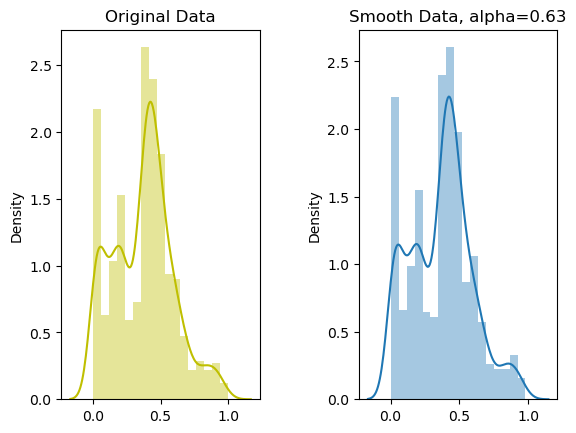

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2)

sns.distplot(dataScale, ax=axs[0], color='y')
axs[0].set_title("Original Data")

sns.distplot(S, ax=axs[1])
axs[1].set_title("Smooth Data" + ", alpha=" + "{:.2f}".format(alpha % 1))


fig.subplots_adjust(wspace=0.5) 

plt.show()


In [8]:
y_pred_SCNN_Lucas = model_SCNN_Lucas.predict(X_test_SCNN_Lucas)
y_pred_SCNN_Lucas = np.reshape(y_pred_SCNN_Lucas, (-1, 1))
mse_SCNN_Lucas = mean_squared_error(y_test_SCNN_Lucas, y_pred_SCNN_Lucas)
rmse_SCNN_Lucas = np.sqrt(mse_SCNN_Lucas)
mape_SCNN_Lucas = mean_absolute_percentage_error(y_test_SCNN_Lucas, y_pred_SCNN_Lucas)
mae_SCNN_Lucas = mean_absolute_error(y_test_SCNN_Lucas, y_pred_SCNN_Lucas)

print('MSE: ', mse_SCNN_Lucas)
print('RMSE: ', rmse_SCNN_Lucas)
print('MAPE: ', mape_SCNN_Lucas)
print('MAE: ', mae_SCNN_Lucas)
print('Time: ', time_SCNN_Lucas)

10/10 [==============================] - 0s 2ms/step
MSE:  0.0013391902299780092
RMSE:  0.03659494814831699
MAPE:  0.07499422254126249
MAE:  0.02985614076450121
Time:  255.16199326515198


<h2>LSTM</h2>

In [9]:
import h5py
from keras.models import load_model
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

# Load model từ file H5
model_LSTM = load_model('AMD_LSTM_73.h5')

# Đọc file H5
with h5py.File('AMD_LSTM_73_data.h5', 'r') as f:
    # Lấy giá trị y_test
    y_test_LSTM = f['y_test'][:]
    
    # Lấy giá trị X_test
    X_test_LSTM = f['X_test'][:]
    
    # Lấy giá trị training_time
    time_LSTM = f['training_time'][()]


In [10]:
model_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [11]:
y_pred_LSTM = model_LSTM.predict(X_test_LSTM)
y_pred_LSTM = np.reshape(y_pred_LSTM, (-1, 1))
mse_LSTM = mean_squared_error(y_test_LSTM, y_pred_LSTM)
rmse_LSTM = np.sqrt(mse_LSTM)
mape_LSTM = mean_absolute_percentage_error(y_test_LSTM, y_pred_LSTM)
mae_LSTM = mean_absolute_error(y_test_LSTM, y_pred_LSTM)

print('MSE: ', mse_LSTM)
print('RMSE: ', rmse_LSTM)
print('MAPE: ', mape_LSTM)
print('MAE: ', mae_LSTM)
print('Time: ', time_LSTM)

10/10 [==============================] - 1s 3ms/step
MSE:  0.0034515234692625396
RMSE:  0.0587496678225719
MAPE:  0.10350881328835329
MAE:  0.04719433634972769
Time:  682.850058555603


<h2>Tổng kết </h2>

In [12]:
from tabulate import tabulate

table = [["MoHinh", "MSE", "RMSE", "MAPE","MAE", "TIME"]]
name = ["CNN-Lucas", "S-CNN-Lucas", "LSTM"]

VALUE_MSE = [mse_CNN_Lucas, mse_SCNN_Lucas, mse_LSTM]
VALUE_RMSE = [rmse_CNN_Lucas, rmse_SCNN_Lucas, rmse_LSTM]
VALUE_MAPE = [mape_CNN_Lucas, mape_SCNN_Lucas, mape_LSTM]
VALUE_MAE = [mae_CNN_Lucas, mae_SCNN_Lucas, mae_LSTM]
VALUE_TIME = [time_CNN_Lucas, time_SCNN_Lucas, time_LSTM]


for mohinh, mse, rmse, mape,mae, time in zip(name, VALUE_MSE, VALUE_RMSE, VALUE_MAPE,VALUE_MAE, VALUE_TIME):
    table.append([mohinh, round(mse, 5), round(rmse, 5), round(mape, 5),round(mae, 5), round(time, 3)])



In [13]:
title_table = "<h3 style='text-align: center; color: green;'>Bảng tổng kết MSE, RMSE, MAPE , TIME của S-CNN, S-CNN-LUCAS, LSTM</h3>"

display(HTML(title_table))

print(tabulate(table, headers="firstrow", tablefmt="fancy_grid"))

╒═════════════╤═════════╤═════════╤═════════╤═════════╤═════════╕
│ MoHinh      │     MSE │    RMSE │    MAPE │     MAE │    TIME │
╞═════════════╪═════════╪═════════╪═════════╪═════════╪═════════╡
│ CNN-Lucas   │ 0.00207 │ 0.04546 │ 0.09248 │ 0.04147 │ 438.204 │
├─────────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ S-CNN-Lucas │ 0.00134 │ 0.03659 │ 0.07499 │ 0.02986 │ 255.162 │
├─────────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ LSTM        │ 0.00345 │ 0.05875 │ 0.10351 │ 0.04719 │ 682.85  │
╘═════════════╧═════════╧═════════╧═════════╧═════════╧═════════╛
